# <center><b>Python for Data Science</b></center>
# <center><b>Lessons 19 & 20</b></center>
# <center><b>Pandas</b></center>
# <center><b>Presentation 12: Important Pandas Topics</b></center>
<center><b>Part One: Missing Values in Pandas</b></center>
<center><b>Part Two: Changing Display Options in Pandas</b></center>
<center><b>Part Three: Dealing with Duplicates in Pandas</b></center>
<center><b>Part Four: The Pandas Inplace Parameter</b></center>

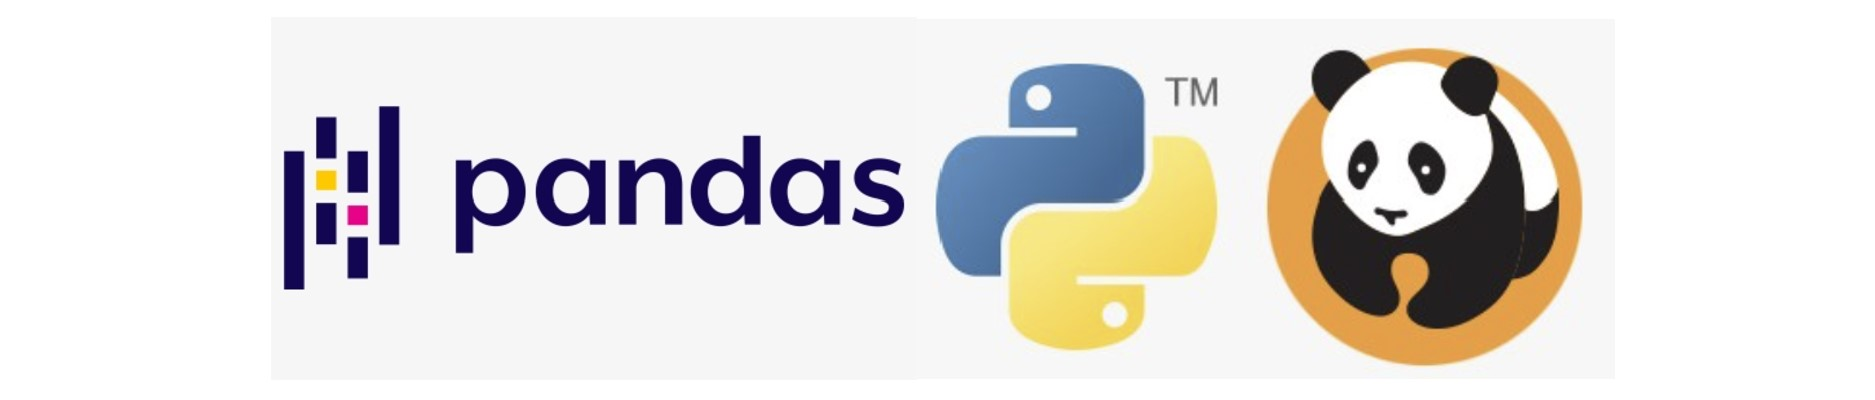

<font size="6"><center>[Link: Pandas Documentation](https://pandas.pydata.org/docs/)</center></font>

In [1]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [2]:
import pandas as pd
import numpy as np

<div class="alert alert-block alert-info"<br>

# <center>PART ONE:</center>
# <center>MISSING VALUES IN PANDAS</center>
</div>

**Article #1:**&emsp;[**Handling Missing Values with Pandas**](https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f)<br>

**Article #2:**&emsp;[**8 Methods For Handling Missing Values With Python Pandas**](https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891)<br>

**Video:**&emsp;[**How Do I Handle Missing Values in Pandas?**](https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=17)<br>

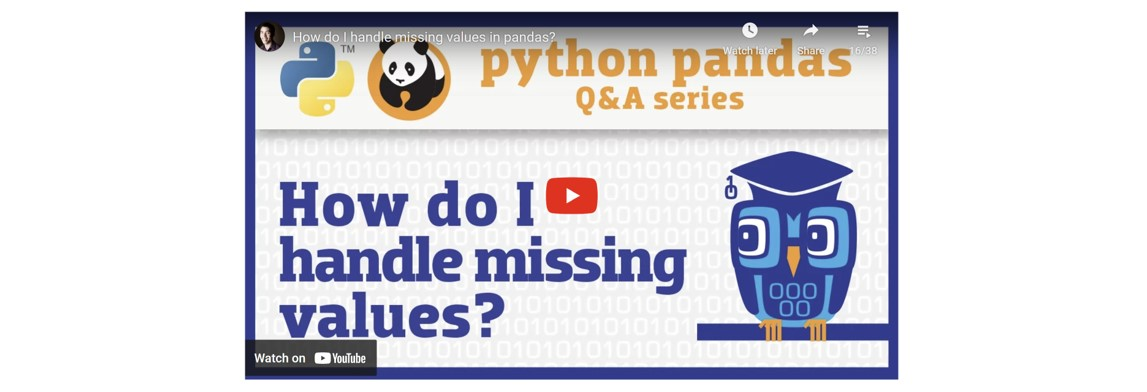

**Documentations Related to Working with Missing Data:**

1. Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

&emsp;&emsp;**What does "NaN" mean?**

  - "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
  - It stands for "Not a Number" and indicates a **missing value**.
  - **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

2. Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

3. Documentation for [**`dropna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

4. Documentation for [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

5. Documentation for [**`fillna`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)

6. [**Working with missing data in pandas**](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

**Presentation:**

##  <span style="color:red">TABLE OF CONTENTS</span>

1. [The isnull and notnull methods](#1)<br>
2. [Dealing with null values](#2)<br>
a. [dropna() method](#2a)<br>
b. [fillna() method](#2b)<br>
c. [value_counts() method](#2c)<br>

<div class="alert alert-block alert-warning">
<b><font size="4">Files needed for this presentation:</font></b>
</div>

[**employees.csv**](v)<br>

***

<a class="anchor" id="1"></a>
# <span style="color:blue"><b>1. The isnull and notnull methods</b></span>

In [3]:
pd.read_csv("employees.csv")

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,8/6/93,NaN,True,Marketing
1,Thomas,Male,3/31/96,61933.0,True,NaN
2,Maria,Female,NaN,130590.0,False,Finance
3,Jerry,NaN,3/4/05,138705.0,True,Finance
4,Larry,Male,1/24/98,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1/31/84,42392.0,False,Finance
997,Russell,Male,5/20/13,96914.0,False,Product
998,Larry,Male,4/20/13,60500.0,False,Business Dev
999,Albert,Male,5/15/12,129949.0,True,Sales


- The employees data set includes plenty of missing values. 
- We can see this by using the info() method.
- For example, in the First Name column thdere are 933 non-null values meaning that there are 1001 - 933 = 68 null or missing values in that column.

In [49]:
employees = pd.read_csv("employees.csv", parse_dates = ["Start Date"])

employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


- We can see a few missing values in our first five rows.

In [10]:
employees.head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


- Pandas marks missing text values and missing numeric values with a NaN (not a number) designation, and it marks missing datetime values with a NaT (not a time) designation. We can see an example in the Start Date column at index position 2.
- We can use several pandas methods to isolate rows with either null or present values in a given column. 
- The isnull method returns a Boolean Series in which True denotes that a row’s value is missing.

In [14]:
 employees["Team"].isnull()

0       False
1        True
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000     True
Name: Team, Length: 1001, dtype: bool

- Pandas considers the NaT and None values to be null as well. 
- The next example invokes the isnull method on the Start Date column.

In [16]:
employees["Start Date"].isnull()

0       False
1       False
2        True
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000     True
Name: Start Date, Length: 1001, dtype: bool

- The notnull method returns the inverse Series, one in which True indicates that a row’s value is present. 
- The following output communicates that indices 0, 2, 3, and 4 do not have missing values.

In [17]:
employees["Team"].notnull().head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

- We can produce the same result set by inverting the Series returned by the isnull method. 
- As a reminder, we use the tilde symbol (~) to invert a Boolean Series.

In [18]:
 (~employees["Team"].isnull()).head()

0     True
1    False
2     True
3     True
4     True
Name: Team, dtype: bool

- Either approach works, but notnull is a bit more descriptive and thus is recommended.
- As always, we can use these Boolean Series to extract specific DataFrame rows.
- Here, we extract all employees with a missing Team value.

In [19]:
no_team = employees["Team"].isnull()
 
employees[no_team].head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
10,Louise,Female,1980-08-12,63241.0,True,NaN
23,NaN,Male,2012-06-14,125792.0,NaN,NaN
32,NaN,Male,1998-08-21,122340.0,NaN,NaN
91,James,NaN,2005-01-26,128771.0,False,NaN


- The next example pulls out employees with a present First Name value.

In [20]:
 has_name = employees["First Name"].notnull()
    
 employees[has_name].tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- The isnull and notnull methods are the best way to quickly filter for present and missing values in one or more rows.

<a class="anchor" id="2"></a>
# <span style="color:blue"><b>2. Dealing with null values</b></span>

- While we’re on the topic of missing values, let’s discuss some options for dealing with them. 
- We can remove missing values by using the dropna method.
- We can also use the fillna method to replace NaNs with a constant value. 

<a class="anchor" id="2a"></a>
## <span style="color:red"><b><i>a. dropna() method</b></span>

In [22]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- The dropna method removes DataFrame rows that hold any NaN values. 
- It doesn’t matter how many values a row is missing; the method excludes the row if a single NaN
is present. 
- The employees DataFrame has a missing value at index 0 of the Salary column, index 1 of the Team column, index 2 of the Start Date column, and index 3 of the Gender column. Notice that pandas excludes all these rows in the following output.

In [24]:
employees.dropna()

,First Name,Gender,Start Date,Salary,Mgmt,Team
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- We can pass the how parameter an argument of "all" to remove rows in which all values are missing. 
- Only one row in the data set, the last one, satisfies this condition.

In [25]:
employees.dropna(how = "all").tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- The how parameter’s default argument is "any". 
- An argument of "any" removes a row if any of its values is absent. 
- Notice that the row at index label 995 has NaN in the Gender column of the preceding output. 
- Compare that output with the following output, in which row 995 is not present; pandas still removes the last row because it has at least one NaN value.

In [27]:
employees.dropna(how = "any").tail()

,First Name,Gender,Start Date,Salary,Mgmt,Team
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- We can use the subset parameter to target rows with a missing value in a specific column. 
- The next example removes rows that have a missing value in the Gender column.

In [29]:
employees.dropna(subset = ["Gender"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
...,...,...,...,...,...,...
994,George,Male,2013-06-21,98874.0,True,Marketing
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- We can also pass the subset parameter a list of columns. 
- Pandas will remove a row if it has a missing value in any of the specified columns. 
- The next example removes rows with missing values in the Start Date column, the Salary column, or both.

In [31]:
employees.dropna(subset = ["Start Date", "Salary"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
1,Thomas,Male,1996-03-31,61933.0,True,NaN
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev


- The thresh parameter specifies a minimum threshold of non-null values that a row must have for pandas to keep it. 
- The next example filters employees for rows with at least four present values.

In [32]:
employees.dropna(how = "any", thresh = 4).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


- The thresh parameter is great when a certain number of missing values renders a row useless for analysis.

<a class="anchor" id="2b"></a>
## <span style="color:red"><b><i>b. fillna() method</b></span>

- Pandas is unable to convert NaN values to integers. 
- If needed, we can solve this problem by replacing the NaN values with a constant value. 
- The fillna method replaces a Series’ null values with the argument we pass in. 
- The next example provides a fill value of 0. 
- Note that your choice of value can distort the data; 0 is passed solely for the sake of example.
- We know that the original Salary column has a missing value in its last row. Let’s take a look at the last row after we invoke the fillna method.

In [34]:
employees["Salary"].fillna(0).tail()

996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, dtype: float64

- Excellent. Now that the Salary column has no missing values, we can convert its values to integers with the astype method.

In [36]:
employees["Salary"].fillna(0).astype(int).tail()

996      42392
997      96914
998      60500
999     129949
1000         0
Name: Salary, dtype: int32

- Next, we can overwrite the existing Salary Series in employees.

In [37]:
employees["Salary"] = employees["Salary"].fillna(0).astype(int)

In [38]:
employees

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,0,True,Marketing
1,Thomas,Male,1996-03-31,61933,True,NaN
2,Maria,Female,NaT,130590,False,Finance
3,Jerry,NaN,2005-03-04,138705,True,Finance
4,Larry,Male,1998-01-24,101004,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392,False,Finance
997,Russell,Male,2013-05-20,96914,False,Product
998,Larry,Male,2013-04-20,60500,False,Business Dev
999,Albert,Male,2012-05-15,129949,True,Sales


In [39]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int32         
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 43.1+ KB


<a class="anchor" id="2c"></a>
## <span style="color:red"><b><i>c. value_counts() method</b></span>

- The value_counts() method groups the values into buckets and then counts the number of elements in each bucket. 
- That is, the value_counts() method counts the number of occurrences of each Series value.

In [46]:
employees['Gender'].value_counts()

Female    431
Male      423
Name: Gender, dtype: int64

In [45]:
employees['Team'].value_counts()

IT              106
Finance         102
Business Dev    101
Marketing        98
Product          95
Sales            94
Engineering      92
HR               91
Distribution     90
Legal            88
Name: Team, dtype: int64

In [43]:
employees[['Gender', 'Team']].value_counts()

Gender  Team        
Female  Business Dev    50
        IT              48
        Product         45
Male    HR              45
Female  Engineering     44
        Finance         44
Male    IT              42
        Marketing       41
        Engineering     40
        Product         40
        Finance         40
        Business Dev    40
Female  Marketing       40
        Sales           39
Male    Sales           39
Female  Distribution    37
        HR              37
Male    Distribution    35
        Legal           35
Female  Legal           34
dtype: int64

In [47]:
employees[['Gender', 'Mgmt', 'Team']].value_counts()

Gender  Mgmt   Team        
Female  True   Business Dev    27
        False  IT              27
Male    False  Product         26
        True   Sales           23
               HR              23
Female  False  Product         23
Male    True   Business Dev    22
        False  Legal           22
Female  True   Engineering     22
        False  Business Dev    22
Male    False  IT              21
Female  True   Finance         21
        False  Engineering     21
        True   Product         21
Male    True   Engineering     21
Female  False  Finance         21
Male    False  HR              20
        True   Marketing       20
Female  True   IT              20
Male    False  Finance         20
Female  True   HR              19
               Legal           19
        False  Distribution    19
Male    False  Marketing       18
Female  False  Sales           18
        True   Marketing       18
        False  Marketing       18
        True   Sales           17
Male    True   Finan

<div class="alert alert-block alert-info"<br>

# <center>PART TWO:</center>
# <center>CHANGING DISPLAY OPTIONS IN PANDAS</center>
</div>

**Article:**&emsp;[**8 Commonly used Pandas display options you should know**](https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95)

**Video:**&emsp;[**How do I change display options in pandas?**](https://www.youtube.com/watch?v=yiO43TQ4xvc&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=29)

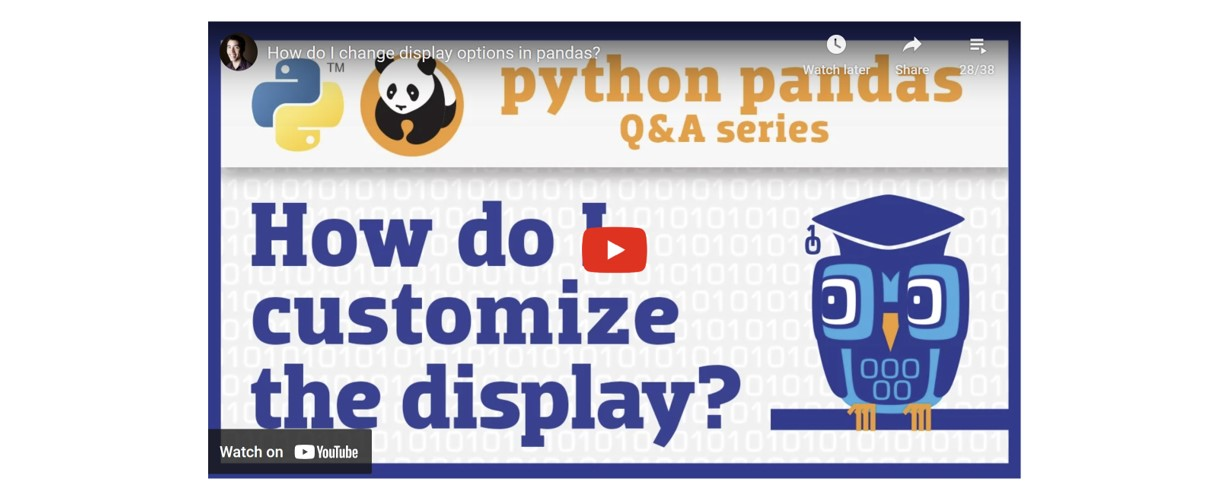

<div class="alert alert-block alert-info"<br>

# <center>PART THREE:</center>
# <center>DEALING WITH DUPLICATES IN PANDAS</center>
</div>

**Article:**&emsp;[**Finding and removing duplicate rows in Pandas DataFrame**](https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f)

**Video:**&emsp;[**How do I find and remove duplicate rows in pandas?**](https://www.youtube.com/watch?v=ht5buXUMqkQ&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=27)

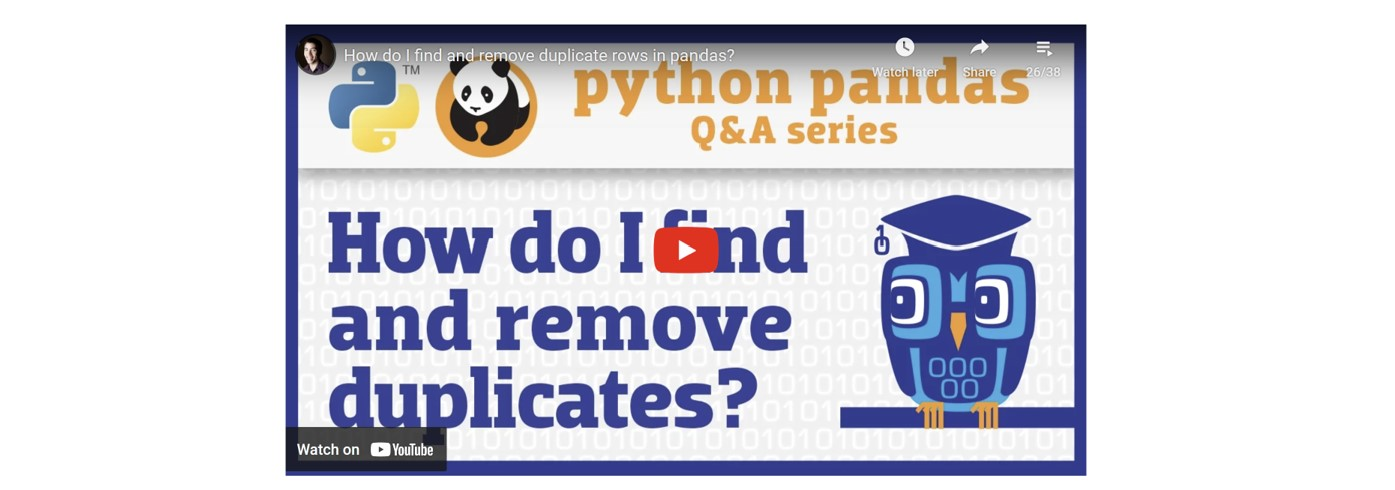

**Presentation:**

##  <span style="color:red">TABLE OF CONTENTS</span>

1. [Dealing with duplicates](#21)<br>
a. [The duplicated method](#21a)<br>
b. [The drop_duplicates method](#21b)<br>

<div class="alert alert-block alert-warning">
<b><font size="4">Files needed for this presentation:</font></b>
</div>

[**employees.csv**](v)<br>

***

<a class="anchor" id="21"></a>
# <span style="color:blue"><b>1. Dealing with duplicates</b></span>

- Missing values are a common occurrence in messy data sets, and so are duplicate values. 
- Luckily, pandas includes several methods for identifying and excluding duplicate values.

<a class="anchor" id="21a"></a>
## <span style="color:red"><b><i>a. The duplicated method</b></span>

- First up, here’s a quick reminder of the first five rows of the Team column. 
- Notice that the value "Finance" appears at index positions 2 and 3.

In [52]:
employees = pd.read_csv("employees.csv", parse_dates = ["Start Date"])

employees['Team'].head()

0    Marketing
1          NaN
2      Finance
3      Finance
4           IT
Name: Team, dtype: object

- The duplicated method returns a Boolean Series that identifies duplicates in a column. 
- Pandas returns True any time it sees a value that it previously encountered in the Series. 
- Consider the next example. The duplicated method marks the firstoccurrence of "Finance" in the Team column as a nonduplicate with False. 
- It marks all subsequent occurrences of "Finance" as duplicates (with True). 
- The same logic applies to all other Team values.

In [54]:
employees["Team"].duplicated().head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

- The duplicated method’s keep parameter informs pandas which duplicate occurrence to keep. 
- Its default argument, "first", keeps the first occurrence of each duplicate value. 
- The following code is equivalent to the preceding code.

In [56]:
employees["Team"].duplicated(keep = "first").head()

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

- We can also ask pandas to mark the last occurrence of a value in a column as the nonduplicate. 
- Pass a string of "last" to the keep parameter.

In [57]:
employees["Team"].duplicated(keep = "last")

0        True
1        True
2        True
3        True
4        True
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Team, Length: 1001, dtype: bool

- Let’s say we want to extract one employee from each team. 
- One strategy we could use is pulling out the first row for each unique team in the Team column. 
- Our existing duplicated method returns a Boolean Series; True identifies all duplicate values after the first encounter. 
- If we invert that Series, we’ll get a Series in which True denotes the first time pandas encounters a value.

In [58]:
 (~employees["Team"].duplicated()).head()

0     True
1     True
2     True
3    False
4     True
Name: Team, dtype: bool

- Now we can extract one employee per team by passing the Boolean Series inside square brackets. 
- Pandas will include the rows with the first occurrences of a value in the Team column. 
- Note that the library considers NaNs to be a unique value.

In [60]:
first_one_in_team = ~employees["Team"].duplicated()
 
employees[first_one_in_team]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


- This output tells us that Douglas is the first employee on the Marketing team in the data set, Thomas is the first one with a missing team, Maria is the first one on the Finance team, and so on.

<a class="anchor" id="21b"></a>
## <span style="color:red"><b><i>b. The drop_duplicates method</b></span>

- A DataFrame’s drop_duplicates method provides a convenient shortcut for accomplishing the operation that was done above. 
- By default, the method removes rows in which all values are equal to those in a previously encountered row. 
- There are no employees rows in which all six row values are equal, so the method doesn’t accomplish much for us with a standard invocation:

In [61]:
employees.drop_duplicates()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
...,...,...,...,...,...,...
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- But we can pass the method a subset parameter with a list of columns that pandas should use to determine a row’s uniqueness. - - The next example finds the first occurrence of each unique value in the Team column. 
- In other words, pandas keeps a row only if it has the first occurrence of a Team value (such as "Marketing"). 
- It excludes all rows with duplicate Team values after the first one

In [62]:
employees.drop_duplicates(subset = ["Team"])

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT
5,Dennis,Male,1987-04-18,115163.0,False,Legal
6,Ruby,Female,1987-08-17,65476.0,True,Product
8,Angela,Female,2005-11-22,95570.0,True,Engineering
9,Frances,Female,2002-08-08,139852.0,True,Business Dev
12,Brandon,Male,1980-12-01,112807.0,True,HR
13,Gary,Male,2008-01-27,109831.0,False,Sales


- The drop_duplicates method also accepts a keep parameter. 
- We can pass it an argument of "last" to keep the rows with each duplicate value’s last occurrence.
- These rows are likely to be closer to the end of the data set. 
- In the following example, Alice is the last employee in the data set on the HR team, Justin is the last employee on the Legal team, and so on.

In [63]:
employees.drop_duplicates(subset = ["Team"], keep = "last")

,First Name,Gender,Start Date,Salary,Mgmt,Team
988,Alice,Female,2004-10-05,47638.0,False,HR
989,Justin,NaN,1991-02-10,38344.0,False,Legal
990,Robin,Female,1987-07-24,100765.0,True,IT
993,Tina,Female,1997-05-15,56450.0,True,Engineering
994,George,Male,2013-06-21,98874.0,True,Marketing
995,Henry,NaN,2014-11-23,132483.0,False,Distribution
996,Phillip,Male,1984-01-31,42392.0,False,Finance
997,Russell,Male,2013-05-20,96914.0,False,Product
998,Larry,Male,2013-04-20,60500.0,False,Business Dev
999,Albert,Male,2012-05-15,129949.0,True,Sales


- One additional option is available for the keep parameter. 
- We can pass an argument of False to exclude all rows with duplicate values. 
- Pandas will reject a row if there are any other rows with the same value. 
- The next example filters for rows in employees with a unique value in the First Name column. 
- In other words, these first names occur only once in the DataFrame.

In [64]:
employees.drop_duplicates(subset = ["First Name"], keep = False)

,First Name,Gender,Start Date,Salary,Mgmt,Team
5,Dennis,Male,1987-04-18,115163.0,False,Legal
8,Angela,Female,2005-11-22,95570.0,True,Engineering
33,Jean,Female,1993-12-18,119082.0,False,Business Dev
190,Carol,Female,1996-03-19,57783.0,False,Finance
291,Tammy,Female,1984-11-11,132839.0,True,IT
495,Eugene,Male,1984-05-24,81077.0,False,Sales
688,Brian,Male,2007-04-07,93901.0,True,Legal
832,Keith,Male,2003-02-12,120672.0,False,Legal
887,David,Male,2009-12-05,92242.0,False,Legal


- Let’s say we want to identify duplicates by a combination of values across multiple columns. We may want the first occurrence of each employee with a unique combination of First Name and Gender in the data set, for example. 
- For reference, here’s a subset of all employees with a First Name of "Douglas" and a Gender of "Male".

In [65]:
name_is_douglas = employees["First Name"] == "Douglas"
is_male = employees["Gender"] == "Male"

employees[name_is_douglas & is_male]

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
217,Douglas,Male,1999-09-03,83341.0,True,IT
322,Douglas,Male,2002-01-08,41428.0,False,Product
835,Douglas,Male,2007-08-04,132175.0,False,Engineering


- We can pass a list of columns to the drop_duplicates method’s subset parameter.
- Pandas will use the columns to determine the presence of duplicates. 
- The next example uses a combination of values across the Gender and Team columns to identify duplicates.

In [66]:
employees.drop_duplicates(subset = ["Gender", "Team"]).head()

,First Name,Gender,Start Date,Salary,Mgmt,Team
0,Douglas,Male,1993-08-06,NaN,True,Marketing
1,Thomas,Male,1996-03-31,61933.0,True,NaN
2,Maria,Female,NaT,130590.0,False,Finance
3,Jerry,NaN,2005-03-04,138705.0,True,Finance
4,Larry,Male,1998-01-24,101004.0,True,IT


- Let’s walk through the output. 
- The row at index 0 holds the first occurrence of the name "Douglas" and the gender "Male" in the employees data set. 
- Pandas will exclude any other rows with the same two values from the results set. 
- To clarify, the library will still include a row if it has a First Name of "Douglas" and a Gender not equal to "Male". 
- Similarly, it will include rows with Gender of "Male" and a First Name not equal to "Douglas". 
- Pandas uses the combination of values across the two columns to identify the duplicates.

<div class="alert alert-block alert-info"<br>

# <center>PART FOUR:</center>
# <center>THE PANDAS INPLACE PARAMETER</center>
</div>

**Article:**&emsp;[**Explaining the Inplace Parameter for Beginners**](https://jman4190.medium.com/explaining-the-inplace-parameter-for-beginners-5de7ffa18d2e)

**Video:**&emsp;[**When should I use the "inplace" parameter in pandas?**](https://www.youtube.com/watch?v=XaCSdr7pPmY&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=21)

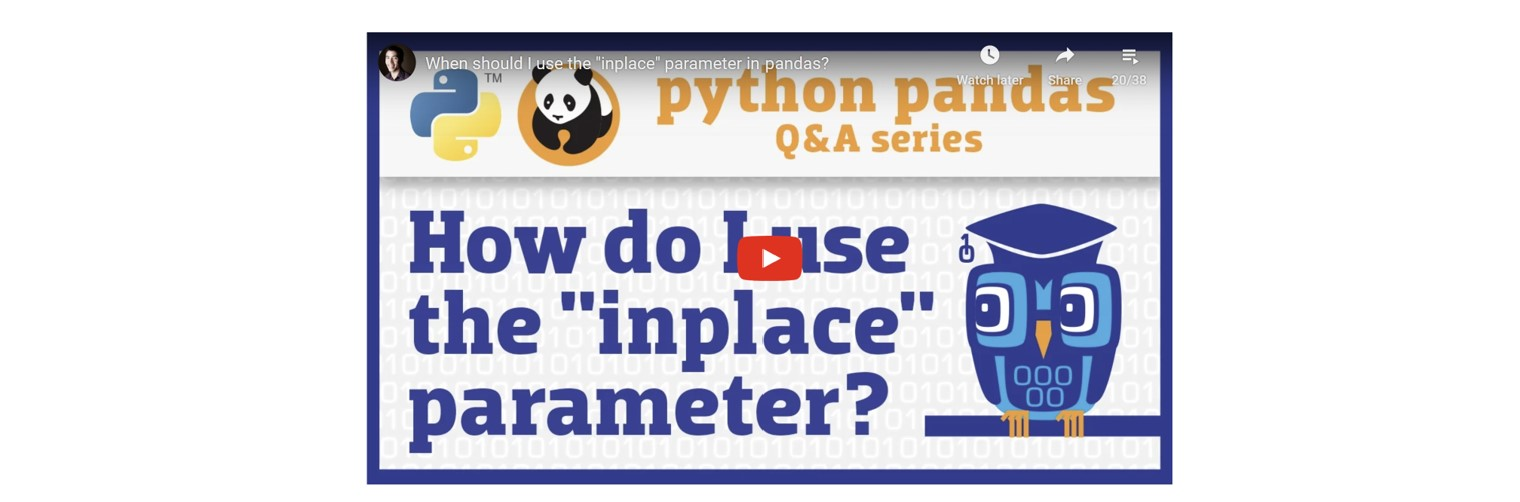